In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


# Reading and Reviewing the Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Splitting the Dataset into Train and Test Splits
A quick glimpse at the dataset is enough to tell that no preprocessing is required. We go straight ahead to split it into the training and test splits

In [4]:
train_x = dataset.iloc[:130, :3]
train_y = dataset.iloc[:130, 3:]
test_x = dataset.iloc[130:, :3]
test_y = dataset.iloc[130:, 3:]

# Data Normalization
Having successfully split the dataset, it's time to normalize the data so that it is in a state which could be fed to the regression algorithm

In [5]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
train_y = np.ravel(train_y)
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()
test_y = np.ravel(test_y)

# Initializing and training the model
Having performed data preparation, it's now time to move towards the actual model. Due to the nature of the problem, we employ the calssic linear regression algorithm made easilty available in sci-kit learn

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)
preds = model.predict(test_x)

# Making predictions

In [7]:
total, total_loss = 0, 0
for actual, predicted in zip(test_y, preds):
    total += 1
    total_loss += (abs(actual - predicted))
print(f"Mean loss is {total_loss/total}")

Mean loss is 1.4174682140672437


# Results Visualisation
In order to properly convey our predictions it would be beneficial to visualize the findings and compare them with what the actual results were. For this purpose we plot three seperate graphs, each comparing the predicted value against the actual value for different features

In [8]:
TV = []
radio = []
newspaper = []
for x in test_x:
    TV.append(x[0])
    radio.append(x[1])
    newspaper.append(x[2])

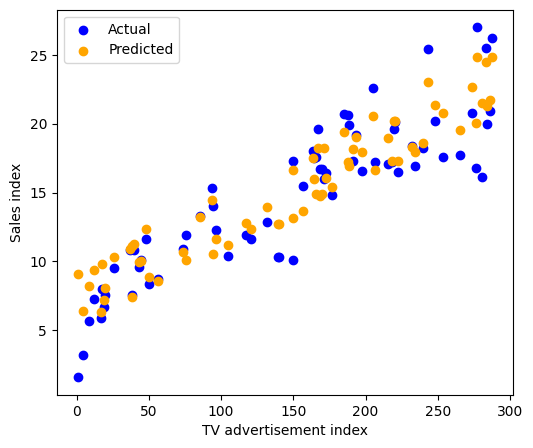

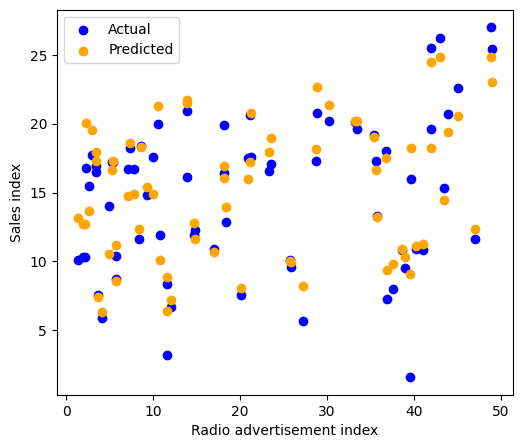

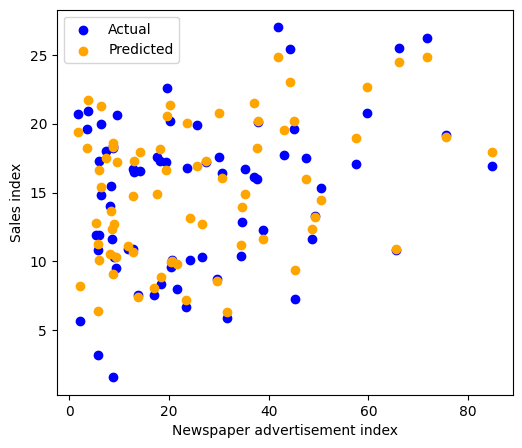

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.scatter(TV, test_y, color='blue', label='Actual')
plt.scatter(TV, preds, color='orange', label='Predicted')
plt.legend()
plt.ylabel("Sales index")
plt.xlabel("TV advertisement index")
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1,3,2)
plt.scatter(radio, test_y, color='blue', label='Actual')
plt.scatter(radio, preds, color='orange', label='Predicted')
plt.legend()
plt.ylabel("Sales index")
plt.xlabel("Radio advertisement index")
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1,3,3)
plt.scatter(newspaper, test_y, color='blue', label='Actual')
plt.scatter(newspaper, preds, color='orange', label='Predicted')
plt.legend()
plt.ylabel("Sales index")
plt.xlabel("Newspaper advertisement index")
plt.show()

# Predicting on a set of unknown values
Now imagine if we owned a business and would like to use this model to predict what our sale index would be given our advertisement indices on various platforms. The following cells exhibit just that functionality of the model

In [12]:
test_indices = [[188.98, 34, 9]]
result = model.predict(test_indices)
result

array([18.58607035])

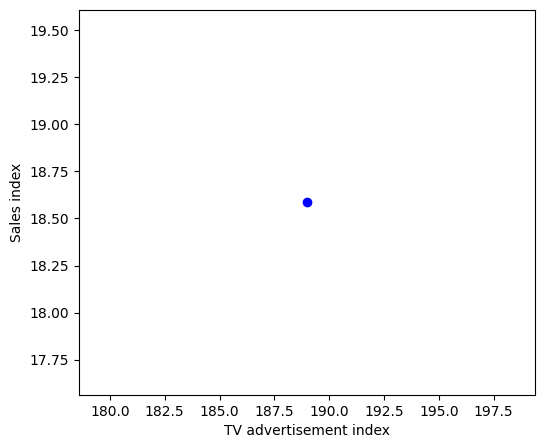

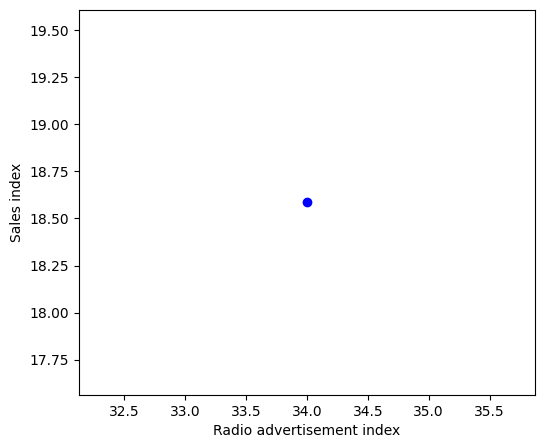

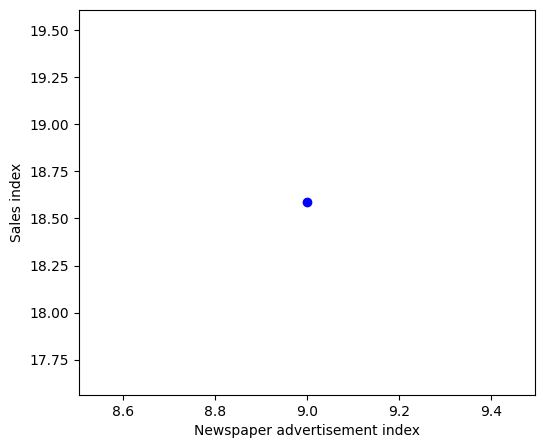

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.scatter(test_indices[0][0], result[0], color='blue')
plt.ylabel("Sales index")
plt.xlabel("TV advertisement index")
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1,3,2)
plt.scatter(test_indices[0][1], result[0], color='blue')
plt.ylabel("Sales index")
plt.xlabel("Radio advertisement index")
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1,3,3)
plt.scatter(test_indices[0][2], result[0], color='blue')
plt.ylabel("Sales index")
plt.xlabel("Newspaper advertisement index")
plt.show()